<a href="https://colab.research.google.com/github/Itallo0708/Computational-Mathematics/blob/main/notebooks/Atividade_2_2_Linear_regression_p_value_and_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questão A)
Iremos começar importando bibliotecas necessárias para essa questão.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.lines import lineStyles
import numpy as np
from scipy import stats

# Funções ultilizadas na questão

In [ ]:
def calculos_regress(x, y):
  slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
  # Covariância
  matriz_cov = np.cov(x, y)
  covariancia = matriz_cov[0][1]

  return slope, intercept, r_value, p_value, std_err, covariancia

# Função para o plot dos gráficos
def plotar_graficos(x, y, estatisticas, titulo, cor):
  slope, intercept, r_value, p_value, std_err, covariancia = estatisticas

  # Pontos
  plt.scatter(x, y, color = cor, s= 150, edgecolor='black', alpha= 0.9, label ='Dados')

  # Reta
  linha_x = np.array([min(x), max(x)])
  linha_y = (slope * linha_x) + intercept
  plt.plot(linha_x, linha_y, color='red', linestyle = '--', linewidth =2, label='Regressão')

  # Caixa de texto
  info = f'P-value: {p_value:.4e}\nCovariancia: {covariancia:.2f}'
  plt.text(0.05, 0.95, info, transform=plt.gca().transAxes,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

  # Plot
  plt.title(titulo)
  plt.xlabel("Gene X")
  plt.ylabel("Gene Y")
  plt.legend()
  plt.grid(True, linestyle=':', alpha=0.6)
  plt.show()

### Gráfico 1

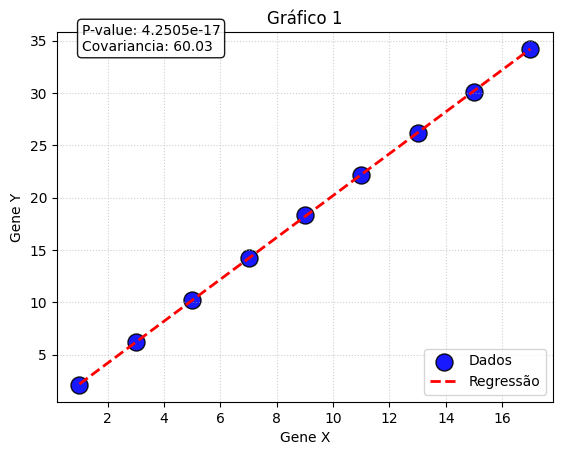

In [ ]:
# Definindo o conjunto dos pontos
x1 = np.array([1, 3, 5, 7, 9, 11, 13, 15, 17])

y1 = np.array([2.1, 6.2, 10.2, 14.2, 18.3, 22.2, 26.2, 30.1, 34.2])

# Executando exemplo
estatisticas = calculos_regress(x1, y1)
plotar_graficos(x1, y1, estatisticas, 'Gráfico 1', 'blue')


* $P-value$:
    * O valor obtido foi extremamente baixo, próximo de zero e muito inferior ao limiar padrão de $0.05$, indicando que a correlação observada é estatisticamente significativa. Podemos afirmar com alta confiança que a associação entre as variáveis não é fruto do acaso.

* 2. Covariância:
    * O valor calculado foi 60.03, sendo um número positivo, confirma que as variáveis têm uma relação direta, quando uma aumenta, a outra também aumenta. A magnitude de 60.03 reflete, em conjunto com a correlação, a forte tendência de crescimento linear observada.

### Gráfico 2

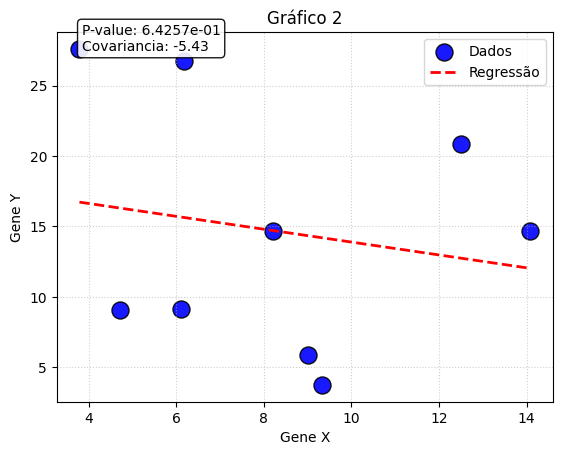

In [ ]:
x2 = np.random.uniform(low=np.min(x1), high=np.max(x1), size=9)
y2 = np.random.uniform(low=np.min(y1), high=np.max(y1), size=9)

# Executando exemplo
estatisticas = calculos_regress(x2, y2)
plotar_graficos(x2, y2, estatisticas, 'Gráfico 2', 'blue')

* $P-value$:
    * O valor calculado foi aproximadamente **0.64**. Assim, Este valor é superior ao limite padrão ($\alpha = 0.05$). Isso significa que não podemos rejeitar a hipótese nula. Estatisticamente, não há evidências suficientes para afirmar que existe uma relação linear entre a expressão das duas variáveis e a distribuição dos pontos provavelmente se deve ao acaso.

* Covariância:
    * O valor obtido foi **-5.43**. O sinal negativo indica uma tendência de associação inversa, sugerindo que conforme a variável X aumenta, a variável Y diminuiria. No entanto, dado o alto *p-value*, essa tendência não é confiável para previsões.

Portanto, o modelo de regressão linear não se ajusta bem a estes dados. A dispersão dos pontos é alta e não segue um padrão linear claro.

# Questão B) Estimando um Intervalo de Confiança para a Média

Importando o arquivo csv com os dados amostrais.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


### Descrição do Dataset

O dataset contém dados sintéticos sobre hábitos de sono e estilo de vida.


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/matematica_computacional/Sleep_health_and_lifestyle_dataset.csv")
df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Nesta análise, será utilizada a variável Sleep Duration (hours) para calcular estatísticas descritivas e construir intervalos de confiança de 90%, 95% e 99% para a média de horas de sono, permitindo estimar esse parâmetro populacional.

In [ ]:
df_sleep_duration = df["Sleep Duration"]
df_sleep_duration.head(10)

,Sleep Duration
0,6.1
1,6.2
2,6.2
3,5.9
4,5.9
5,5.9
6,6.3
7,7.8
8,7.8
9,7.8


### Função para os calculos
Essa função realiza os calculos estatisticos necessários, tais como : média, desvio padrão, erro padrão e os limites do intervalo de confiança

In [2]:
def calcular_intervalo(dados, nivel_confianca):
  dados_tratados = dados.dropna()
  n = len(dados_tratados)
  media = np.mean(dados_tratados)
  desvio_padrao = np.std(dados_tratados, ddof=1)
  erro_padrao = desvio_padrao / np.sqrt(n)

  # intervalo
  limite_inferior, limite_superior = stats.t.interval(nivel_confianca, df=n-1, loc=media, scale=erro_padrao)

  return {
      "media": media,
      "desvio_padrao": desvio_padrao,
      "erro_padrao": erro_padrao,
      "limite_inferior": limite_inferior,
      "limite_superior": limite_superior,
      "nivel": nivel_confianca,
      "n": n
  }

### Função para Exibir os Gráficos
Função auxiliar para plotar a distribuição da média e o intervalo de confiança:

In [3]:
def plotar_distribuicao(estatisticas, t_student = False):

    media = estatisticas["media"]
    desvio_padrao = estatisticas["desvio_padrao"]
    erro = estatisticas["erro_padrao"]
    inf = estatisticas["limite_inferior"]
    sup = estatisticas["limite_superior"]
    nivel = estatisticas["nivel"]
    n = estatisticas["n"]

    # Criar dados para a curva Eixo X focado na média
    x = np.linspace(media - 4*erro, media + 4*erro, 1000)
    # decidir qual distribuição usar
    if t_student:
      y = stats.t.pdf(x, n -1, media, erro)
    else:
      y = stats.norm.pdf(x, media, erro)

    fig, ax = plt.subplots(figsize=(10, 5))

    # Desenhar a curva
    ax.plot(x, y, color='#d62728', linewidth=2) # Vermelho

    # Preencher a área de confiança
    ax.fill_between(x, y, where=((x >= inf) & (x <= sup)), color='lightgray', alpha=0.7)

    # Linhas verticais
    ax.axvline(media, color='black', linestyle='--', alpha=0.6)
    ax.axvline(inf, color='black', linestyle='--', alpha=0.6)
    ax.axvline(sup, color='black', linestyle='--', alpha=0.6)

    # Caixa de texto
    texto = (f"Média: {media:.2f}\n"
             f"Desvio Padrão: {desvio_padrao:.2f}\n"
             f"Amostra (n): {n}")

    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    ax.text(0.05, 0.95, texto, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=props)

    # Remove as marcações do gráfico
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.get_yaxis().set_ticks([])

    # Mostrar a média e os limites de confiançna no eixo x
    ax.set_xticks([inf, media, sup])
    ax.set_xticklabels([f'{inf:.2f}', f'{media:.2f}', f'{sup:.2f}'], fontsize=11)

    ax.set_title(f'Distribuição da Média ({nivel*100:.0f}% Confiança)', fontsize=14)

    plt.show()

### Intervalo de Confiança de 90%

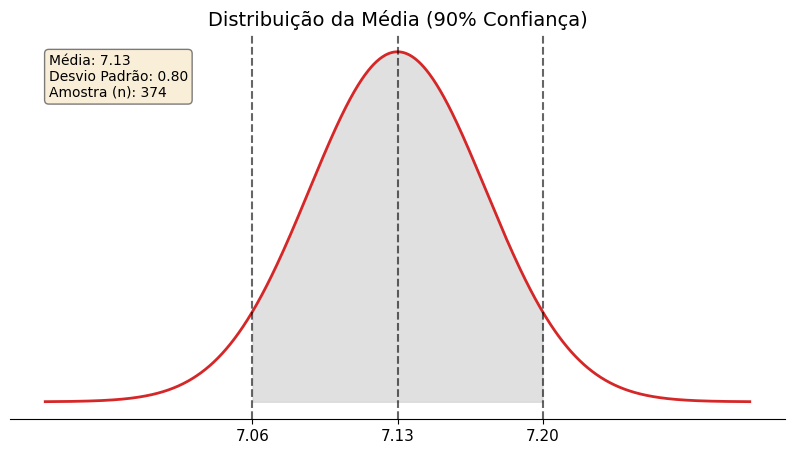

In [ ]:
estatisticas_90 = calcular_intervalo(df_sleep_duration, 0.90)
plotar_distribuicao(estatisticas_90)

### Intervalo de Confiança de 95%

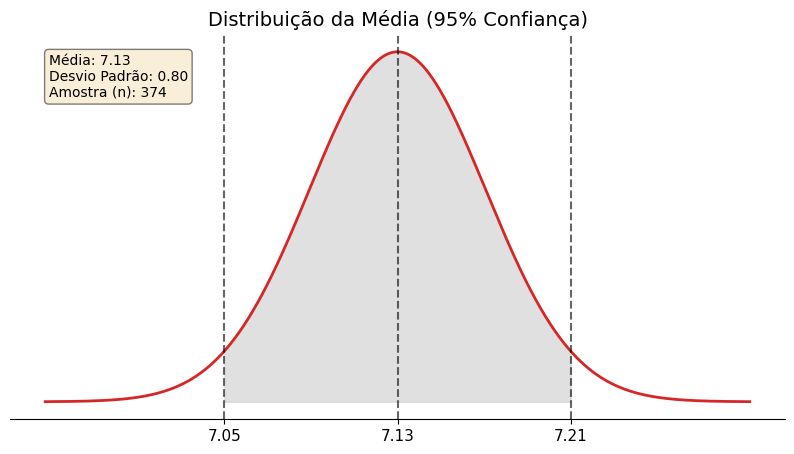

In [ ]:
estatisticas_95 = calcular_intervalo(df_sleep_duration, 0.95)
plotar_distribuicao(estatisticas_95)

### Intervalo de Confiança de 99%

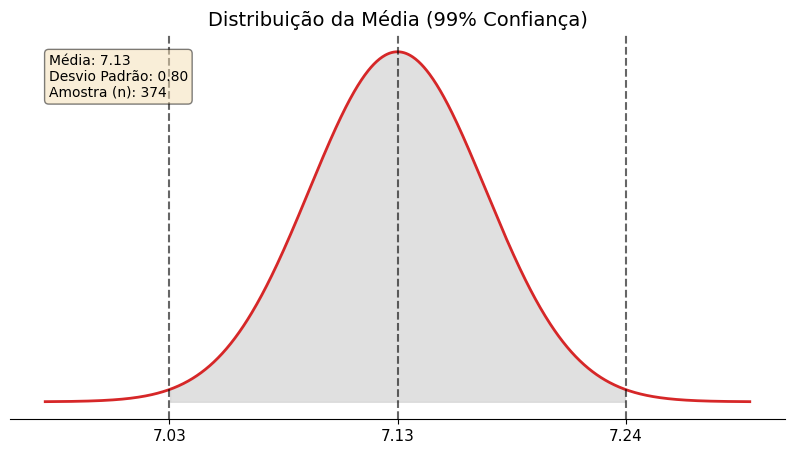

In [ ]:
estatisticas_99 = calcular_intervalo(df_sleep_duration, 0.99)
plotar_distribuicao(estatisticas_99)

O intervalo de confiança torna-se mais largo, variando aproximadamente de **7,03 a 7,24**. Isso significa que a estimativa é feita com altíssima confiança, porém com menor precisão, já que o intervalo é mais extenso.
Esse comportamento reflete o trade-off entre confiança e largura do intervalo.

# C) p-value em um Teste de Hipótese


Nesta questãoo, investigaremos se a presença de um distúrbio do sono diagnosticado afeta significativamente a duração média do sono em comparação com indivíduos saudáveis.

### Definição dos Grupos
* Grupo de Controle: Indivíduos que não declararam nenhum distúrbio do sono, valores nulos no dataset.
* Grupo de Teste: Indivíduos diagnosticados com alguma condição.

### Formulação das Hipóteses
* Hipótese Nula: A média de horas de sono é igual para os dois grupos. Ter um distúrbio não altera a média de sono. Para esse teste, adotaremos o nível de significância $\alpha = 0.05$.

### Execução do Teste
Primeiramente vamos separar os grupos de controle e de teste.

In [ ]:
from pandas.core.dtypes.missing import notna
# Carregar os dados do dataser
df = pd.read_csv('/content/drive/MyDrive/matematica_computacional/Sleep_health_and_lifestyle_dataset.csv')

# Separandos os grupos
grupo_controle = df[df['Sleep Disorder'].isna()]['Sleep Duration']
grupo_teste = df[df['Sleep Disorder'].notna()]['Sleep Duration']



Realizando os cálculos:

In [ ]:
# T test
t_stat, p_value = stats.ttest_ind(grupo_controle, grupo_teste)
# Exibindo resultados
print(f"--- Análise: Com Distúrbio vs Sem Distúrbio ---")
print(f"Média (Grupo Controle/Saúdavel): {grupo_controle.mean():.2f} horas (n = {len(grupo_controle)})")
print(f"Média (Grupo Teste/Distúrbios): {grupo_teste.mean():.2f} horas (n = {len(grupo_teste)})")
print("-" * 53)
print(f"Estatística t: {t_stat:.4f}")
print(f"P-valor:       {p_value:.4e}")
print("-" * 53)

--- Análise: Com Distúrbio vs Sem Distúrbio ---
Média (Grupo Controle/Saúdavel): 7.36 horas (n = 219)
Média (Grupo Teste/Distúrbios): 6.81 horas (n = 155)
-----------------------------------------------------
Estatística t: 6.9412
P-valor:       1.7384e-11
-----------------------------------------------------


### Conclusão

### Análise do P-valor
O teste retornou um *p-value* de **$1.7384 \times 10^{-11}$**.

*  Adotamos um nível de significância de $\alpha = 0.05$. Logo, O valor obtido é drasticamente menor que o limite estabelecido.

* Portanto Concluímos que deve-se rejeitar a Hipotese Nula, pois o $p-value$ muito menor que o nível de significância adotado, indica que as diferenças do comportamento de sono entre as pessoas saudáveis e com distúrbios de sono não foram fruto do acaso.

Estatisticamente, confirma-se que a presença de distúrbios reduz a duração do sono de forma significativa.



#Questão D) Significance Level
Segue o link para a apresentação dos slides:

https://docs.google.com/presentation/d/1jYwppBLG4yN57S8wuU_1doHKwbKLH4yddvmFE3mcYug/edit?slide=id.g3bc994d2eb0_0_51#slide=id.g3bc994d2eb0_0_51


# Questão E) Reproduzindo Slides em Código
Primeiramente vamos calcular o Intervalo de Confiança para a Média. Nessa etapa, o objetivo é estimar a frequência cardíaca média de repouso para toda a população de mulheres, com base em nossa amostra de 50 indivíduos.

Utilizamos uma média amostral de $\bar{x} = 75.9$ bpm. Como estamos lidando com uma média e o desvio padrão da população é desconhecido, utilizamos a distribuição t de Student.

In [15]:
from scipy.stats import t, norm

# Dados
n = 50
media_amostra = 75.9
# margem erro final dado no slide
margem_erro = 3.8

# Parametros
confidence_level = 0.95
alpha = 1 - confidence_level
degrees_of_freedom = n -1

# Valor crítico t
t_critical = t.ppf(1 - alpha/2, degrees_of_freedom)

# calculo do desvio padrão
desvio_padrao = (margem_erro * np.sqrt(n)) / t_critical

# Calculo do intervalo
erro_padrao = desvio_padrao / np.sqrt(n)

limite_inferior = media_amostra - margem_erro
limite_superior = media_amostra + margem_erro



### Fazendo a plotagem do gráfico temos:
Seguindo o procedimento apresentado nos slides, o intervalo de confiança foi construído a partir da média amostral e da margem de erro fornecida. Para fins de visualização gráfica, o desvio padrão amostral foi estimado a partir da margem de erro, permitindo a utilização da distribuição t de Student.

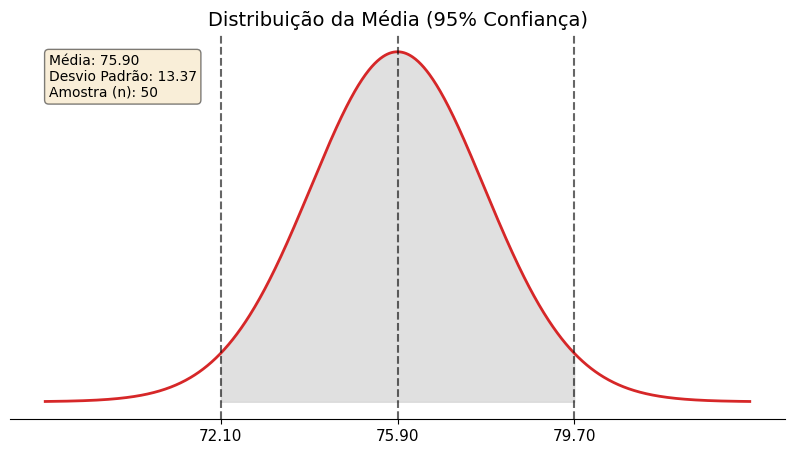


O t_critical é: 2.0096e+00


In [16]:
# Formatando os dados para a função de plot criada anteriormente:
dados_para_plotar = {
    "media": media_amostra,
    "desvio_padrao": desvio_padrao,
    "erro_padrao": erro_padrao,
    "limite_inferior": limite_inferior,
    "limite_superior": limite_superior,
    "nivel": confidence_level,
    "n": n
}

# Plot do gráfico

plotar_distribuicao(dados_para_plotar, True)
print(f"\nO t_critical é: {t_critical:.4e}")


Agora vamos calcular o Intervalo de Confiança para a Proporção.

Nosso objetivo é estimar qual porcentagem da população inteira de mulheres possui uma frequência cardíaca alta, definida no slide como superior a 100 bpm.

Nesse cenário, Em nossa amostra de $n=50$ mulheres, observou-se que 12% ($p=0.12$) apresentavam frequência cardíaca alta. Para proporções, utilizamos a Distribuição Normal Padrão (Z) em vez da distribuição t.

Asim,  utilizaremos o valor crítico $z \approx 1.96$ (para 95% de confiança) e a fórmula do erro padrão para proporções: $$\sqrt{\frac{p(1-p)}{n}}$$



In [14]:
# Dados
p = 0.12

# Calculando o valor crítico Z
z_critical = norm.ppf(1 - alpha/2)
desvio_padrao_propocao = np.sqrt(p * (1 - p))

# Calculo do intervalo
erro_padrao_proporcao = np.sqrt((p * (1 - p)) / n)
margem_erro_proporcao = z_critical * erro_padrao_proporcao

limite_inferior_proporcao = p - margem_erro_proporcao
limite_superior_proporcao = p + margem_erro_proporcao

### Plotagem do gráfico:


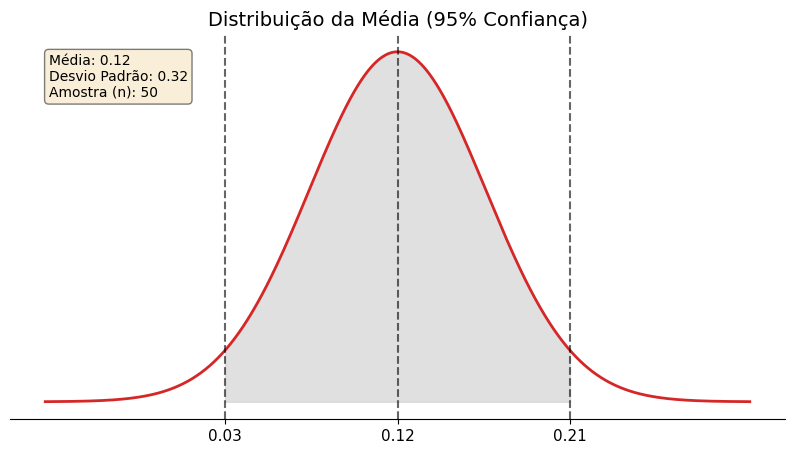


O z_critical é: 1.9600e+00


In [11]:
# Formatando os dados para a função de plot criada anteriormente:
dados_para_plotar_prop = {
    "media": p,
    "desvio_padrao": desvio_padrao_propocao,
    "erro_padrao": erro_padrao_proporcao,
    "limite_inferior": limite_inferior_proporcao,
    "limite_superior": limite_superior_proporcao,
    "nivel": confidence_level,
    "n": n
}

# Plot do gráfico

plotar_distribuicao(dados_para_plotar_prop)
print(f"\nO z_critical é: {z_critical:.4e}")

# Questão F)


Primeiramente vamos reproduzir o gráfico do slide 16.

In [ ]:
def plotar_grafico_slide(x, y, cor, slope, intercept, titulo):
  # Pontos
  plt.scatter(x, y, color = cor, s= 150, edgecolor='black', alpha= 0.9, label ='Dados')

  # Reta
  linha_x = np.array([min(x), max(x)])
  linha_y = (slope * linha_x) + intercept
  plt.plot(linha_x, linha_y, color='red', linestyle = '--', linewidth =2, label='Regressão')

  # Plot
  plt.title(titulo)
  plt.xlabel("Mouse size")
  plt.ylabel("Mouse Weight")
  plt.legend()
  plt.grid(True, linestyle=':', alpha=0.6)
  plt.show()

Exibindo gráfico:

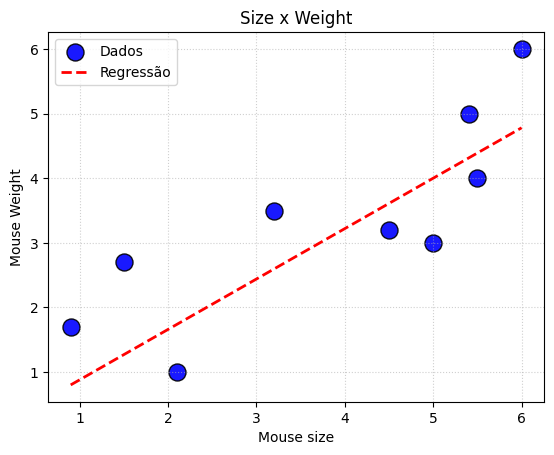

In [ ]:
  # Dados
  x = np.array([0.9, 1.5, 2.1, 3.2, 4.5, 5.0, 5.4, 5.5, 6.0])
  y = np.array([1.7, 2.7, 1.0, 3.5, 3.2, 3.0, 5.0, 4.0, 6.0])

  cor = 'blue'
  slope = 0.78
  intercept = 0.1

  # Exibição
  plotar_grafico_slide(x, y, cor, slope, intercept, 'Size x Weight')

### Aplicando Regressão linear scikit-learn

In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.cm as cm
# Dados
x = np.array([0.9, 1.5, 2.1, 3.2, 4.5, 5.0, 5.4, 5.5, 6.0])
y = np.array([1.7, 2.7, 1.0, 3.5, 3.2, 3.0, 5.0, 4.0, 6.0])
# Aplicando o Scikit learn

X = x.reshape(-1,1)
model_sklearn = LinearRegression()
model_sklearn.fit(X, y)
r2_sklearn = model_sklearn.score(X, y)

b_sklearn = model_sklearn.intercept_
a_sklearn = model_sklearn.coef_[0]
print(f" Intercept sklearn: {b_sklearn}")
print(f" Slope sklearn: {a_sklearn}")

# Aplicando statsmodel para gerar as estatísticas
X_stats = sm.add_constant(x)
models_stats = sm.OLS(y, X_stats).fit()

print(f"\n--- Statsmodels: Estatísticas ---")
print(models_stats.summary())


 Intercept sklearn: 0.8459888770379398
 Slope sklearn: 0.6594164254152065

--- Statsmodels: Estatísticas ---
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     14.05
Date:                Sat, 31 Jan 2026   Prob (F-statistic):            0.00718
Time:                        23:06:49   Log-Likelihood:                -11.179
No. Observations:                   9   AIC:                             26.36
Df Residuals:                       7   BIC:                             26.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------

### Análise dos dados do Sumário
1. R-squared ($R^2$):
  * Ele indica a porcentagem da variação na variável dependente que é explicada pela variável independente. Nesse caso, o valor de $0.667$ significa que 66,7% da variação no peso dos ratos pode ser explicada pelo seu tamanho.

2.  Adj. R-squared ($R^2$ Ajustado):
    * Uma ajuste do $R^2$ que leva em consideração e penaliza a adição de variáveis desnecessárias ao modelo. Nesse caso, o $R^2$ ajustado cai um pouco para $0.620$. Se tivéssemos adicionado muitas variáveis ruins, esse número cairia drasticamente. O fato de estar próximo do $R^2$ original indica que a variável "Tamanho" é relevante.
3. F-statistic:
    *  Um teste global para verificar se o modelo, é estatisticamente significativo. Ele compara o seu modelo com um modelo que não tem preditores, apenas a média. Nesse caso, o valor de $14.05$ é relativamente alto para este tamanho de amostra, o que sugere que o modelo é melhor do que simplesmente "chutar" a média do peso para todos os ratos.
4. Prob (F-statistic): 0.00718
    * É a probabilidade de obter um F-statistic tão alto puramente por acaso. Nesse cenário, como o valor $0.00718$ é menor que $0.05$, o padrão de significância de 5%, rejeitamos a hipótese nula. Isso confirma que o modelo é estatisticamente significativo. Existe uma relação real entre os dados, não é coincidência.
5. $P-Value$:
    * Valores de p-value pequenos indicam alta evidência estatística, aumentando a confiança de que o slope ou o intercept são significativamente diferentes de zero. Nesse caso, o $P-value$ do Slope (0.007), indica que a influência do tamanho sobre o peso é real e estatisticamente significativa, rejeitando a hipótese de que a inclinação da reta seja nula. No entanto, o $P-value$ do Intercept (0.289), indica que não há evidência suficiente para afirmar que a reta começa fora do zero, sugerindo que estatisticamente o intercepto poderia ser nulo

### Plot de retas com diferentes inclinações
Na regressão linear realizada com $scikit-learn$ obtemos o $intercept$ = $0.8459 \times 10^{-12}$. Assim iremos plotar o gráfico com 6 diferentes valores de coeficientes angulares, além do plot com o valor de $intercept$ e $slope$ encontrados pela regressão linear.


In [ ]:
# Criando uma lista de coeficientes angulares para os testes
lista_a = np.linspace(a_sklearn - 0.9, a_sklearn + 0.9, 6)

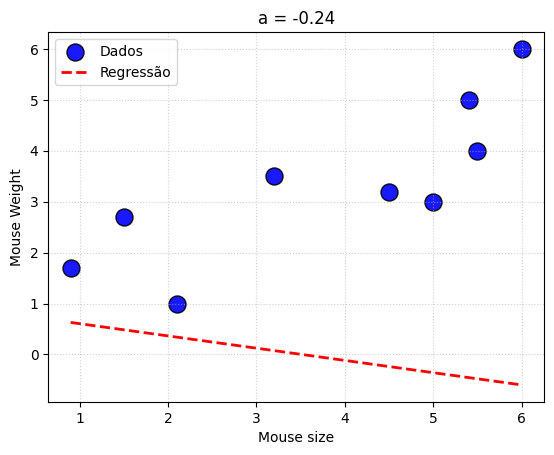

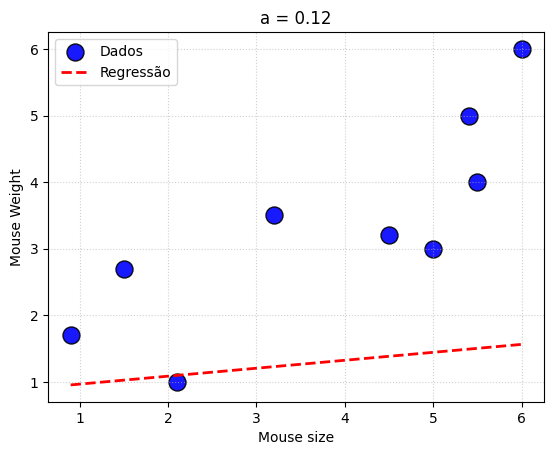

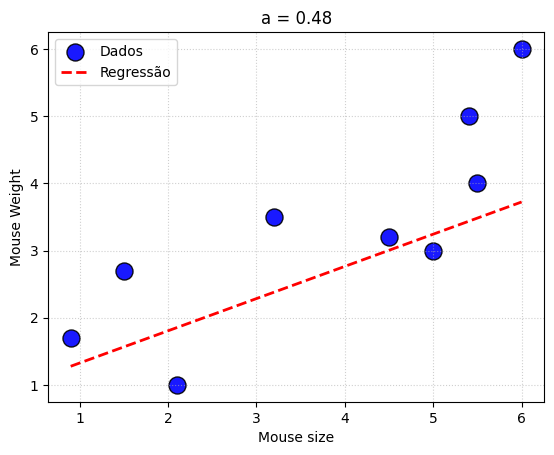

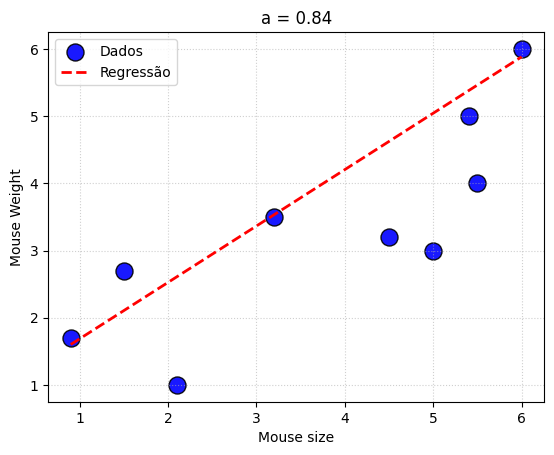

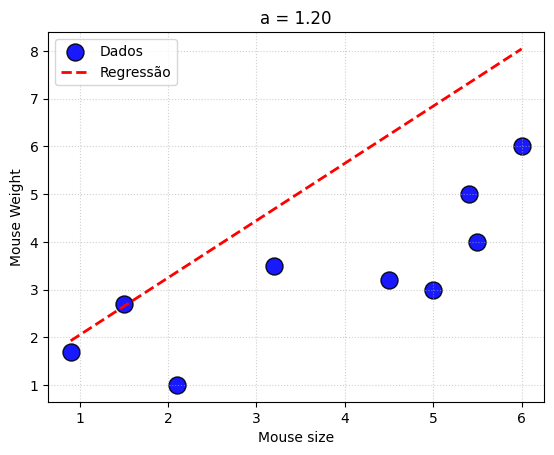

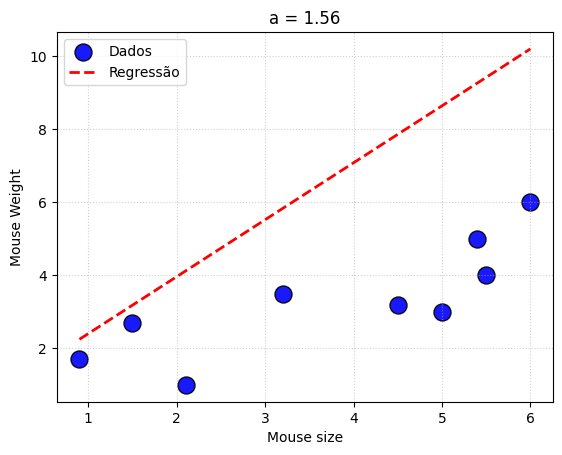

In [ ]:
x = np.array([0.9, 1.5, 2.1, 3.2, 4.5, 5.0, 5.4, 5.5, 6.0])
y = np.array([1.7, 2.7, 1.0, 3.5, 3.2, 3.0, 5.0, 4.0, 6.0])

# Retas com 6 diferentes coeficientes

for i in range(len(lista_a)):
  cor = 'blue'
  slope = lista_a[i]
  intercept = b_sklearn
  plotar_grafico_slide(x, y, cor, slope, intercept, f"a = {lista_a[i]:.2f}")



### Reta com o coeficiente angular encontrado na regressão linear:

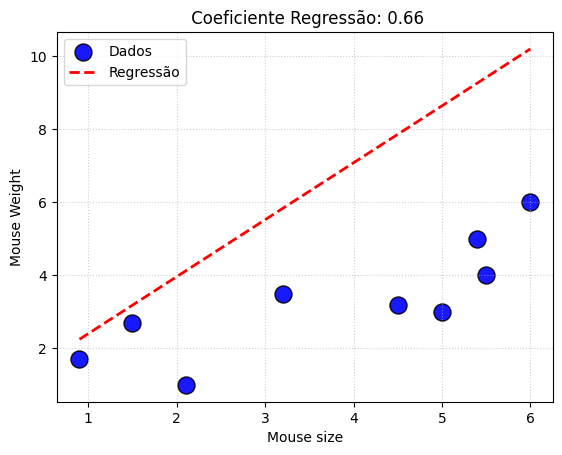

In [ ]:
# Reta com coeficiente encontrado
plotar_grafico_slide(x, y, cor, slope, intercept, f" Coeficiente Regressão: {a_sklearn:.2f}")

# Gráfico da soma
SSR (Sum of Squared Residuals): Representa a Soma dos Quadrados dos Resíduos. É uma medida de erro. Ela calcula a distância vertical (o resíduo) entre cada ponto de dados real e a reta traçada, eleva essa distância ao quadrado e soma tudo.


Cálculos da soma dos quadrados dos erros.

In [ ]:
from sklearn.metrics import r2_score
ssr_valores = []
r2_lista = []

for a in lista_a:
    # Previsão usando o 'a' variável e o 'b' fixo
    y_pred = (a * x) + b_sklearn

    # Somar erros ao quadrado
    ssr = np.sum((y - y_pred) ** 2)
    ssr_valores.append(ssr)

    # Cálculo do R^2
    r2 = r2_score(y, y_pred)
    r2_lista.append(r2)

Plotando o gráfico da Soma dos Quadrados dos Erros.

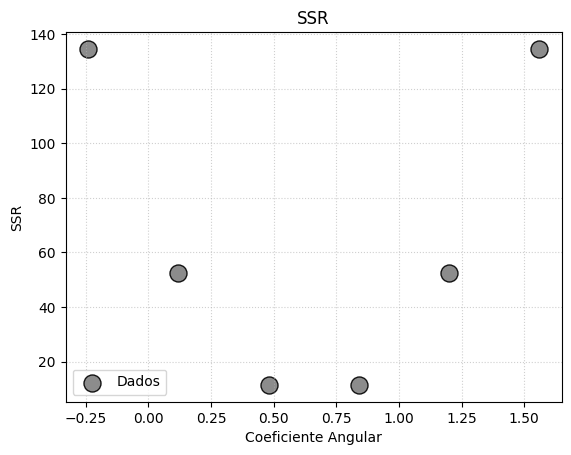

In [ ]:
def plotar_grafico_ssr(x, y, cor, titulo):
  # Pontos
  plt.scatter(x, y, color = cor, s= 150, edgecolor='black', alpha= 0.9, label ='Dados')

  # Plot
  plt.title(titulo)
  plt.xlabel("Coeficiente Angular")
  plt.ylabel("SSR")
  plt.legend()
  plt.grid(True, linestyle=':', alpha=0.6)
  plt.show()



x_ssr = lista_a
y_ssr = ssr_valores
cor = "gray"
plotar_grafico_ssr(x_ssr,y_ssr,cor, "SSR")

### Comparação dos R-Squared:
Representa a qualidade do ajuste. Ele indica a proporção da variação nos dados que é explicada pelo modelo.


Existe uma relação inversa direta: o ponto onde o SSR é mínimo é exatamente o ponto onde o $R^2$ é máximo.

In [ ]:
for i in range (6):
  print(f"O R-Squared para a inclinação {lista_a[i]:.2f} é: {r2_lista[i]:.2f}")

O R-Squared para a inclinação -0.24 é: -6.08
O R-Squared para a inclinação 0.12 é: -1.76
O R-Squared para a inclinação 0.48 é: 0.40
O R-Squared para a inclinação 0.84 é: 0.40
O R-Squared para a inclinação 1.20 é: -1.76
O R-Squared para a inclinação 1.56 é: -6.08


In [ ]:
print(f"O R-Squared encontrado pelo scikit-learn é: {r2_sklearn:.2}")

O R-Squared encontrado pelo scikit-learn é: 0.67


Ao testar diferentes rotações, obtivemos valores de $R^2$ variados.Nas melhores tentativas com valores de $a$ arbitrários, o $R^2$ aproximou-se de 0.40.

O algoritmo LinearRegression do Scikit-Learn utiliza o método dos Mínimos Quadrados Ordinários (OLS) para calcular matematicamente a inclinação exata que resulta no menor erro possível. Como resultado, o modelo treinado alcançou um $R^2$ de aproximadamente 0.67.

# Questão G) fatoração LU com estratégia de pivoteamento parcial

Definindo uma função para imprimir as matrizes:

In [ ]:
def imprimir_matriz(msg, A):
  print(f"\n-- {msg} ---")
  linhas, colunas = A.shape
  for i in range (linhas):
    linhas_str = " ".join(f"{val:7.3f}" for val in A[i])
    print(f"[ {linhas_str}]")

Definindo uma função para resolver o pivoteamento:

In [ ]:
def resolver_sistema_lu_pivo(A_in, b_in):
  # cópias
  A = A_in.copy().astype(float)
  b = b_in.copy().astype(float)
  n = len(A)

  # Vetor de permutação
  p = np.arange(n)

  print(f"Matriz Inicial A(0): \n{A}" )
  print(f"Vetor p inicial: {p + 1}")

  # 1. Fatoração
  for k in range(n-1):
    print(f"\n=== Etapa k = {k+1} ===")

    # Procura o pivo e sua respectiva linha
    pv = abs(A[k, k])
    r = k

    for i in range(k + 1, n):
      if abs(A[i, k]) > pv:
        pv = abs(A[i, k])
        r = i
    print(f"Pivô encontrado: {A[r, k]} na linha {r + 1}")

    # Verifica singularidade
    if pv == 0:
      raise ValueError("A matriz é singular.")

    # Permuta linhas
    if r != k:
      print(f"Permutando linhas {k + 1} e {r + 1}")

      p_aux = p[k]
      p[k] = p[r]
      p [r] =  p_aux

      # troca na matriz
      A[[k, r]] = A[[r, k]]

    print(f"Vetor p atualizado: {p + 1}")
    imprimir_matriz(f"Matriz antes da eliminação da etapa {k + 1}", A)

    # Eliminação de Gauss

    for i in range(k + 1, n):
      # multiplicador
      m = A[i, k] / A[k, k]

      # Guarda na parte inferior da matriz L
      A[i, k] = m

      # Atualiza o resto da linha
      for j in range(k + 1, n):
        A[i, j] = A[i, j] - m * A[k, j]

      imprimir_matriz(f"Matriz A ({k + 1}) após eliminação", A)

  # Pegar matriz L e U
  # diagonal principal
  L = np.eye(n)
  U = np.zeros((n, n))

  for i in range(n):
    for j in range(n):
      if i > j:
        L[i, j] = A[i, j]
      else:
        U[i, j] = A[ i, j]

  print("\nResultado da Fatoração")
  imprimir_matriz("Matriz L (Multiplicadores)", L)
  imprimir_matriz("Matriz L (Triangular Superior)", U)
  print(f"Vetor de Permutação final p: {p + 1}")

  # 2. Sistemas Triangulares
  print("Resolução dos Sistemas Triangulares")

  # Permutação vetor b
  b_permutado = b[p]
  print(f"Vetor b original: {b}")
  print(f"Vetor b permutado: {b_permutado}")

  # Resolução de Ly
  y = np.zeros(n)

  for i in range(n):
    soma = 0
    for j in range(i):
      soma += L[i, j] * y[j]
    y[i] = b_permutado[i] - soma
  print(f"Solução intermediária y: {y}")

  # Resolução de Ux
  x = np.zeros(n)
  for i in range(n -1, -1, -1):
    soma = 0
    for j in range(i + 1, n):
      soma += U[i, j] * x[j]
    x[i] = (y[i] - soma) / U[i, i]

  print(f"Solução final x: {x}")

  return x



### Aplicando ao exemplo 7

In [ ]:
# Dados
A_exemplo = np.array([
    [3, -4, 1],
    [1, 2, 2],
    [4, 0, -3]
], dtype=float)

b_exemplo = np.array([9, 3, -2], dtype=float)

# Executar
x_final = resolver_sistema_lu_pivo(A_exemplo, b_exemplo)

Matriz Inicial A(0): 
[[ 3. -4.  1.]
 [ 1.  2.  2.]
 [ 4.  0. -3.]]
Vetor p inicial: [1 2 3]

=== Etapa k = 1 ===
Pivô encontrado: 4.0 na linha 3
Permutando linhas 1 e 3
Vetor p atualizado: [3 2 1]

-- Matriz antes da eliminação da etapa 1 ---
[   4.000   0.000  -3.000]
[   1.000   2.000   2.000]
[   3.000  -4.000   1.000]

-- Matriz A (1) após eliminação ---
[   4.000   0.000  -3.000]
[   0.250   2.000   2.750]
[   3.000  -4.000   1.000]

-- Matriz A (1) após eliminação ---
[   4.000   0.000  -3.000]
[   0.250   2.000   2.750]
[   0.750  -4.000   3.250]

=== Etapa k = 2 ===
Pivô encontrado: -4.0 na linha 3
Permutando linhas 2 e 3
Vetor p atualizado: [3 1 2]

-- Matriz antes da eliminação da etapa 2 ---
[   4.000   0.000  -3.000]
[   0.750  -4.000   3.250]
[   0.250   2.000   2.750]

-- Matriz A (2) após eliminação ---
[   4.000   0.000  -3.000]
[   0.750  -4.000   3.250]
[   0.250  -0.500   4.375]

Resultado da Fatoração

-- Matriz L (Multiplicadores) ---
[   1.000   0.000   0.000]
[ 

### Procedimento
O procedimento segue a estratégia de Pivoteamento Parcial, onde buscamos o maior valor absoluto na coluna atual para ser o pivô, garantindo maior estabilidade numérica.

1. Estado inicial
* O sistema começa com a matriz $A^{(0)}$ e o vetor de permutação $p$ ordenado, indicando que nenhuma troca de linhas ocorreu ainda. Matriz: $$\begin{bmatrix} 3 & -4 & 1 \\ 1 & 2 & 2 \\ 4 & 0 & -3 \end{bmatrix}$$

$$Vetor p: [1, 2, 3]$$

2. Etapa $k=1$ (Primeira Coluna)
* O algoritmo examina a primeira coluna ($3, 1, 4$).

  Escolha do Pivô: O maior valor absoluto é 4.0, que está na linha 3.
  
  Permutação: Trocamos a linha 1 pela linha 3. O vetor $p$ é atualizado para $[3, 2, 1]$, registrando que a linha 3 original agora ocupa a primeira posição.
  
  Eliminação: Calculamos os multiplicadores para zerar os elementos abaixo do pivô:$m_{21} = 1/4 = 0.25$$ ; m_{31} = 3/4 = 0.75$ Esses multiplicadores são armazenados na própria matriz (na parte inferior), resultando na matriz $A^{(1)}$.

3. Etapa $k=2$ (Segunda Coluna)
* O algoritmo examina a segunda coluna, mas apenas das linhas 2 para baixo.

  Escolha do Pivô: Comparamos $|2.0|$ e $|-4.0|$. O maior é 4.0 (absoluto), que está na linha 3 atual.

  Permutação: Trocamos a linha 2 pela linha 3. O vetor $p$ torna-se $[3, 1, 2]$.

  Eliminação: O multiplicador necessário é calculado.

4. Extração dos Fatores L e U
* o final do loop, a matriz compacta é separada:
    * Matriz L (Lower): Contém os multiplicadores calculados ($0.75, 0.25, -0.5$) e 1 na diagonal principal.
    * Matriz U (Upper): Contém o resultado final da eliminação triangular superior ($4, -4, 4.375$ na diagonal).

  $$L = \begin{bmatrix} 1 & 0 & 0 \\ 0.75 & 1 & 0 \\ 0.25 & -0.5 & 1 \end{bmatrix}, \quad U = \begin{bmatrix} 4 & 0 & -3 \\ 0 & -4 & 3.25 \\ 0 & 0 & 4.375 \end{bmatrix}$$

5. Resolução do Sistema
* Para encontrar o vetor $x$, resolvemos dois sistemas triangulares sequenciais:
  * Permutação de b: O vetor original $b = [9, 3, -2]$ é reordenado conforme o vetor $p=[3, 1, 2]$, gerando $Pb = [-2, 9, 3]$.

  * Ly = Pb: Encontramos $y = [-2, 10.5, 8.75]$.

  * Ux = y: Encontramos a solução final $x = [1, -1, 2]$.

# Questão H) MÉTODO ITERATIVO DE GAUSS-JACOBI


Implementação do teorema 4: Critério de Linhas

In [ ]:
def teorema_4_criterio_linhas(A):
  print("\n VERIFICAÇÃO DO TEOREMA 4: CRITÉRIO DAS LINHAS")
  n = len(A)
  alphas = []

  for k in range(n):
      # Soma dos módulos dos elementos fora da diagonal
      soma_adj = sum(abs(A[k][j]) for j in range(n) if j != k)
      # Elemento da diagonal
      diag = abs(A[k][k])

      # Cálculo de alpha_k
      alpha_k = soma_adj / diag
      alphas.append(alpha_k)
      print(f"Linha {k+1}: Soma dos não-diagonais = {soma_adj}, Diagonal = {diag} -> alpha_{k+1} = {alpha_k:.4f}")

  alpha_max = max(alphas)
  print(f"\nValor máximo de alpha: {alpha_max:.4f}")

  if alpha_max < 1:
      print("CONDIÇÃO SATISFEITA (alpha < 1): O método converge para qualquer x(0).")
      return True
  else:
      print("AVISO: O critério das linhas não foi satisfeito (alpha >= 1). A convergência não é garantida.")
      return False

Implementação do passo a passo:

In [ ]:
def gauss_jacobi_exemplo(A, b, x0, tol, max_iter=10):

    n = len(b)
    x_old = x0.copy()
    x_new = np.zeros(n)

    print("\n RESOLUÇÃO DO EXEMPLO")
    print(f"x(0) inicial: {x_old}")
    print(f"Tolerância (epsilon): {tol}")

    # Mostrar matrizes C e g
    C = np.zeros((n, n))
    g = np.zeros(n)
    for i in range(n):
        for j in range(n):
            if i != j:
                C[i][j] = -A[i][j] / A[i][i]
        g[i] = b[i] / A[i][i]

    print("\nNa forma matricial x(k+1) = Cx(k) + g temos:")
    print("Matriz C:")
    print(C)
    print("Vetor g:")
    print(g)
    print("-" * 50)

    for k in range(max_iter):
        print(f"\nIteração k = {k} (Calculando x({k+1})):")

        # Cálculo de x(k+1) usando a fórmula iterativa
        for i in range(n):
            soma = 0
            for j in range(n):
                if i != j:
                    soma += A[i][j] * x_old[j]
            x_new[i] = (b[i] - soma) / A[i][i]

        # Exibição dos valores calculados
        print(f"x({k+1}) = {x_new}")

        # Cálculo do erro relativo

        # Numerador max |x_new - x_old|
        diffs = np.abs(x_new - x_old)
        max_diff = np.max(diffs)

        # Denominador: max |x_new|
        max_val_x = np.max(np.abs(x_new))

        dr = max_diff / max_val_x

        # Estatisticas do cálculo
        print(f"Diferenças absolutas |x({k+1}) - x({k})|: {diffs}")
        print(f"Máximo das diferenças (numerador): {max_diff:.4f}")
        print(f"Máximo valor absoluto de x({k+1}) (denominador): {max_val_x:.4f}")
        print(f"d_r({k+1}) = {max_diff:.4f} / {max_val_x:.4f} = {dr:.4f}")

        # Verificação de convergência
        if dr < tol:
            print(f"\nCONVERGÊNCIA ALCANÇADA: {dr:.4f} < {tol}")
            print(f"Solução Final x_barra aprox x({k+1}):\n{x_new}")
            break
        else:
            print(f"Continuando... ({dr:.4f} > {tol})")
            x_old = x_new.copy()

### Execução do Exemplo 10:

In [ ]:
# Dados
A = np.array([
    [10.0, 2.0, 1.0],
    [1.0, 5.0, 1.0],
    [2.0, 3.0, 10.0]
])

b = np.array([7.0, -8.0, 6.0])

# Aproximação inicial dada no livro x(0) = [0.7, -1.6, 0.6]t
x0 = np.array([0.7, -1.6, 0.6])

# Tolerância
epsilon = 0.05

# 1. Aplicar Teorema 4
converge = teorema_4_criterio_linhas(A)

# 2. Se convergir, resolver o sistema
if converge:
    gauss_jacobi_exemplo(A, b, x0, epsilon)


 VERIFICAÇÃO DO TEOREMA 4: CRITÉRIO DAS LINHAS
Linha 1: Soma dos não-diagonais = 3.0, Diagonal = 10.0 -> alpha_1 = 0.3000
Linha 2: Soma dos não-diagonais = 2.0, Diagonal = 5.0 -> alpha_2 = 0.4000
Linha 3: Soma dos não-diagonais = 5.0, Diagonal = 10.0 -> alpha_3 = 0.5000

Valor máximo de alpha: 0.5000
CONDIÇÃO SATISFEITA (alpha < 1): O método de Gauss-Jacobi converge para qualquer x(0).

 RESOLUÇÃO DO EXEMPLO
x(0) inicial: [ 0.7 -1.6  0.6]
Tolerância (epsilon): 0.05

Na forma matricial x(k+1) = Cx(k) + g temos:
Matriz C:
[[ 0.  -0.2 -0.1]
 [-0.2  0.  -0.2]
 [-0.2 -0.3  0. ]]
Vetor g:
[ 0.7 -1.6  0.6]
--------------------------------------------------

Iteração k = 0 (Calculando x(1)):
x(1) = [ 0.96 -1.86  0.94]
Diferenças absolutas |x(1) - x(0)|: [0.26 0.26 0.34]
Máximo das diferenças (numerador): 0.3400
Máximo valor absoluto de x(1) (denominador): 1.8600
d_r(1) = 0.3400 / 1.8600 = 0.1828
Continuando... (0.1828 > 0.05)

Iteração k = 1 (Calculando x(2)):
x(2) = [ 0.978 -1.98   0.966]
Di

### Procedimento
1. Verificação do Teorema 4
* O algoritmo calcula o $\alpha$ para cada linha da matriz $A$:Linha 1: $|2| + |1| = 3$. Divide pelo pivô $|10|$. $\alpha_1 = 3/10 = 0.3$.

* Linha 2: $|1| + |1| = 2$. Divide pelo pivô $|5|$. $\alpha_2 = 2/5 = 0.4$.

* Linha 3: $|2| + |3| = 5$. Divide pelo pivô $|10|$. $\alpha_3 = 5/10 = 0.5$.

* Conclusão: O máximo é $0.5 < 1$. O critério é satisfeito.

2. Iteração $k=0$ (Calculando $x^{(1)}$)
* O código calcula $x^{(1)}$ usando $x^{(0)} = [0.7, -1.6, 0.6]$.

* Resultados:$x_1 = 0.96$$x_2 = -1.86$$x_3 = 0.94$Cálculo do Erro $d_r^{(1)}$:Diferenças: $|0.96 - 0.7| = 0.26$, $|-1.86 - (-1.6)| = 0.26$, $|0.94 - 0.6| = 0.34$.
* Máximo diferença: $0.34$.
* Máximo valor de $x^{(1)}$: $|-1.86| = 1.86$.$d_r = 0.34 / 1.86 = \mathbf{0.1828}$.Como $0.1828 > 0.05$, continua.

3. Iteração $k=1$ (Calculando $x^{(2)}$)
* O código usa $x^{(1)}$ para achar $x^{(2)}$.

* Resultados: $[0.978, -1.98, 0.966]$.

* Cálculo do Erro $d_r^{(2)}$: Máximo numerador: $0.12$.

* Máximo denominador: $1.98$.$d_r = 0.12 / 1.98 = \mathbf{0.0606}$.

* Como $0.0606 > 0.05$, continua.

4. Iteração $k=2$ (Calculando $x^{(3)}$)
* Resultados: $[0.9994, -1.9888, 0.9984]$.

* Cálculo do Erro $d_r^{(3)}$: Máximo numerador: $0.0324$.

* Máximo denominador: $1.9888$.$d_r = 0.0324 / 1.9888 = \mathbf{0.0163}$.

* Como 0.0163 < 0.05, o código para e exibe a solução final.

# Quesstão I) MÉTODO ITERATIVO DE GAUSS-SEIDEL


Implementação do critério de SASSENFELD:


In [ ]:
def criterio_sassenfeld(A):

    print("\nCRITÉRIO DE SASSENFELD")

    n = len(A)
    betas = np.zeros(n)

    for i in range(n):
        numerador = 0
        termos = []

        for j in range(n):
            if i != j:
                val = abs(A[i][j])
                # Se j < i, o beta já foi calculado e "ajuda" a reduzir o valor
                if j < i:
                    numerador += val * betas[j]
                    termos.append(f"|{A[i][j]}|*{betas[j]:.2f}")
                else:
                    numerador += val
                    termos.append(f"|{A[i][j]}|")

        diag = abs(A[i][i])
        betas[i] = numerador / diag

        print(f"Beta {i+1}: ({' + '.join(termos)}) / {diag} = {betas[i]:.4f}")

    beta_max = max(betas)
    print(f"\nMáximo Beta: {beta_max:.4f}")

    if beta_max < 1:
        print("CONDIÇÃO SATISFEITA (Beta < 1): O método de Gauss-Seidel converge.")
        return True
    else:
        print("AVISO: Critério de Sassenfeld não satisfeito.")
        return False

Implementação do Passo a passo exemplo 14:

In [ ]:
def gauss_seidel_exemplo14(A, b, x0, tol, max_iter=10):

    print("\nRESOLUÇÃO DO EXEMPLO 14")

    n = len(b)
    x = x0.copy() # Vetor atual
    print(f"x(0) = {x}")
    print(f"Tolerância = {tol}")

    for k in range(max_iter):
        print(f"\n--- Iteração k = {k} (Calculando x({k+1})) ---")
        x_old_iter = x.copy() # estado anterior para calcular erro

        # Loop pelas variáveis
        for i in range(n):
            soma = 0
            # Monta string para mostrar a conta passo a passo
            conta_str = f"({b[i]}"

            for j in range(n):
                if i != j:
                    # usa o valor mais recente de x[j] disponível
                    soma += A[i][j] * x[j]
                    conta_str += f" - {A[i][j]}*{x[j]:.4f}"

            x[i] = (b[i] - soma) / A[i][i]
            conta_str += f") / {A[i][i]}"

            print(f"x_{i+1}: {conta_str} = {x[i]:.6f}")

        print(f"Vetor x({k+1}): {x}")

        # Cálculo do Erro Relativo
        diffs = np.abs(x - x_old_iter)
        max_diff = np.max(diffs)      # Numerador
        max_val = np.max(np.abs(x))   # Denominador

        dr = max_diff / max_val

        print(f"Erro dr: {max_diff:.4f} / {max_val:.4f} = {dr:.6f}")

        if dr < tol:
            print(f"\n>>> CONVERGÊNCIA ALCANÇADA NA ITERAÇÃO {k+1} <<<")
            print(f"Solução Final: {x}")
            break

Execução do Exemplo 14:

In [ ]:
# Dados
A_sis = np.array([
    [5.0, 1.0, 1.0],
    [3.0, 4.0, 1.0],
    [3.0, 3.0, 6.0]
])

b_sis = np.array([5.0, 6.0, 0.0])

x_inicial = np.array([0.0, 0.0, 0.0])
epsilon = 5e-2

# Execução
teorema_4_criterio_linhas(A_sis)

criterio_sassenfeld(A_sis)

gauss_seidel_exemplo14(A_sis, b_sis, x_inicial, epsilon)


 VERIFICAÇÃO DO TEOREMA 4: CRITÉRIO DAS LINHAS
Linha 1: Soma dos não-diagonais = 2.0, Diagonal = 5.0 -> alpha_1 = 0.4000
Linha 2: Soma dos não-diagonais = 4.0, Diagonal = 4.0 -> alpha_2 = 1.0000
Linha 3: Soma dos não-diagonais = 6.0, Diagonal = 6.0 -> alpha_3 = 1.0000

Valor máximo de alpha: 1.0000
AVISO: O critério das linhas não foi satisfeito (alpha >= 1). A convergência não é garantida.

CRITÉRIO DE SASSENFELD
Beta 1: (|1.0| + |1.0|) / 5.0 = 0.4000
Beta 2: (|3.0|*0.40 + |1.0|) / 4.0 = 0.5500
Beta 3: (|3.0|*0.40 + |3.0|*0.55) / 6.0 = 0.4750

Máximo Beta: 0.5500
CONDIÇÃO SATISFEITA (Beta < 1): O método de Gauss-Seidel converge.

RESOLUÇÃO DO EXEMPLO 14
x(0) = [0. 0. 0.]
Tolerância = 0.05

--- Iteração k = 0 (Calculando x(1)) ---
x_1: (5.0 - 1.0*0.0000 - 1.0*0.0000) / 5.0 = 1.000000
x_2: (6.0 - 3.0*1.0000 - 1.0*0.0000) / 4.0 = 0.750000
x_3: (0.0 - 3.0*1.0000 - 3.0*0.7500) / 6.0 = -0.875000
Vetor x(1): [ 1.     0.75  -0.875]
Erro dr: 1.0000 / 1.0000 = 1.000000

--- Iteração k = 1 (Cal

### Procedimento
1. Verificação de Convergência
* Antes de iniciar os cálculos, o algoritmo verifica se o sistema atende às condições que garantem a estabilidade do método:
  * Critério das Linhas: Calcula-se o coeficiente $\alpha$ para cada linha, soma dos elementos fora da diagonal dividida pelo elemento da diagonal. Se o maior $\alpha$ for menor que 1, a convergência é garantida tanto para Jacobi quanto para Gauss-Seidel. Caso $\alpha \geq 1$, o teste é inconclusivo.

  * Critério de Sassenfeld: Específico para o método de Gauss-Seidel, calcula-se os coeficientes $\beta$, utilizando os valores de $\beta$ já atualizados das linhas anteriores. Se $\beta_{max} < 1$, garante-se a convergência mesmo que o Critério das Linhas falhe.

2. Processo Iterativo
* Diferente do método de Jacobi, o algoritmo de Gauss-Seidel utiliza a estratégia de atualização imediata, a cada iteração $k$, o valor da variável $x_i^{(k+1)}$ é calculado utilizando os valores mais recentes disponíveis das outras variáveis.
* Isso significa que, para calcular $x_2$, o algoritmo já utiliza o novo valor de $x_1$ calculado na mesma iteração, acelerando a propagação da informação e, frequentemente, a convergência.

3. Controle de Erro e Critério de Parada
* Ao final de cada iteração, calcula-se o erro relativo ($d_r$) entre o vetor atual e o vetor da iteração anterior, o erro é definido pela maior diferença absoluta entre as componentes, normalizada pelo maior valor absoluto do vetor atual.
* O processo iterativo é interrompido assim que o erro $d_r$ for menor que a tolerância pré-estabelecida ($\epsilon$) ou quando o número máximo de iterações for atingido.